# Loading the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

# Reading and exploring the dataset

In [2]:
data = pd.read_csv("health care diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Calculating rows and columns

In [3]:
data.shape

(768, 9)

# Dataset information overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Summary statistics for the dataset

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Preprocessing

# Treating Missing values in the dataset

In [7]:
data['BloodPressure'].mean()

69.10546875

In [8]:
#Identifying mean of the features

print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())
print(data['BMI'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667
31.992578124999977


In [9]:
# Finding number of rows that have null values(represented by 0)

print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [10]:
# Finding the null value percentage

selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100
 
# Displaying the null value percentage for each selected column

print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [11]:
# Replacing the null values with the mean

data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data['BMI'] = data['BMI'].replace([0], [data['BMI'].mean()])

In [14]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [15]:
#Checking the null value percentage of the treated columns

null_percentage_treated = (data[selected_columns] == 0).mean() * 100
 
# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
BMI              0.0
dtype: float64


# Outlier detection

In [16]:
columns = data[selected_columns]
type(columns)

pandas.core.frame.DataFrame

In [17]:
columns.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'], dtype='object')

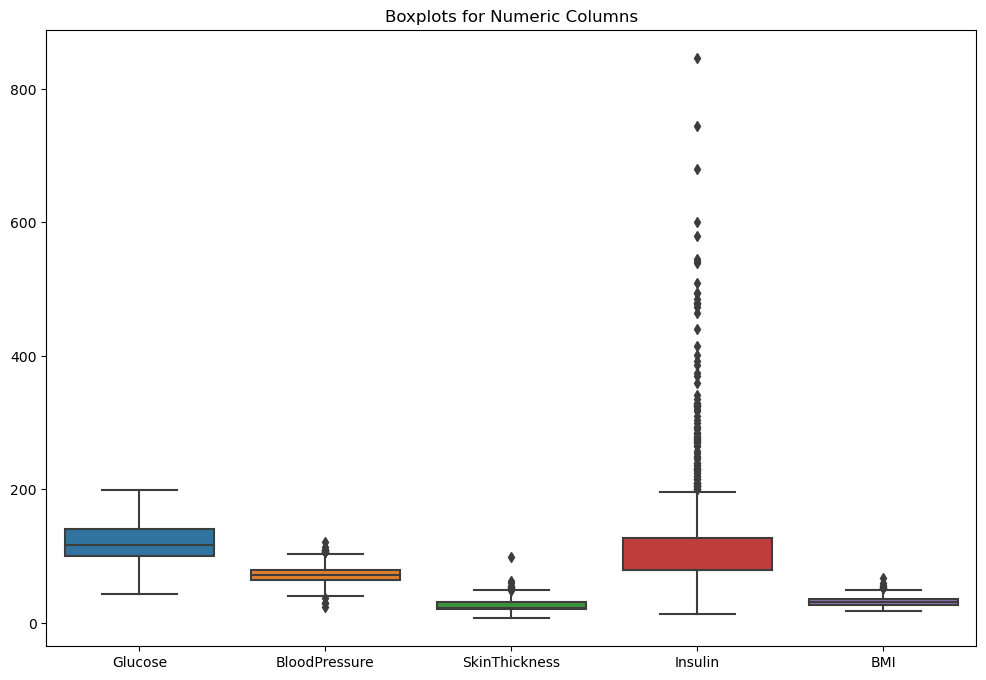

In [18]:
# Display boxplots for numeric columns to visualize outliers

plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [19]:
# Finding the Outlier Count in the selected Columns:

def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
 
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
 
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
 
    # Count the number of outliers
    count_outliers = len(outliers)
 
    return count_outliers
 
# Calculate and print the number of outliers for each column of interest

for column_name in columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89
Number of outliers in the 'BMI' column: 8


# Boxplot analysis for numerical columns

The boxplot analysis is given for the five features: Glucose, BloodPressure, SkinThickness, Insulin and BMI.
The following inferences can be drawn:

## Glucose

1. The IQR is sufficiently large.
2. It doesn't contain any outliers.
3. The average glucose level is approximately 121 mg/dL

## BloodPressure

1. The IQR is relatively small, indicating lesser variations.
2. It has few outliers.
3. The average BloodPressure level is approximately 72 mmHg.

## SkinThickness 

1. The IQR is not that large.
2. It also has few outliers.
3. The average SkinThickness is approximately 26 micrometer.

## Insulin 

1. The IQR is sufficiently large, indicating greater variations in insulin levels.
2. It has More outliers, mainly in the upper range.
3. The average insulin level is approximately 119 U/mL.

## BMI

1. The IQR is very small, indicating lesser variations.
2. It has few outliers in the higher region.
3. The average BMI is approximately 32.

# Outlier treatment

In [20]:
sorted(data)
Q1 = data.quantile(0.20) #considering some outliers
Q3 = data.quantile(0.80)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.600000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [21]:
data_cleared_iqr = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(688, 9)
(768, 9)


In [22]:
data_cleared_iqr.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


# Inferences from IQR outlier treatment

## 1. Dataset size reduction

The original dataset had size of (768, 9). After outlier treatment, the final dataset has been reduced to (688, 9) which is a considerable decrease of approximately 80 rows.

## 2. Detected outliers

Outliers were identified and removed from various columns, mainly impacting Glucose, BloodPressure, SkinThickness, Insulin and BMI.

## 3. Preserved Features

The IQR treatment was applied to 9 columns, including predicting features like Glucose and Insulin along with target variabel Outcome

## 4. Consideration for Domain Knowledge

the decision to remove outliers should be made with consideration for domain knowledge, as outliers may also contain valuable information or certain features.

In [23]:
col = data_cleared_iqr[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']]
col

,Glucose,BloodPressure,SkinThickness,Insulin
0,148.0,72.0,35.000000,79.799479
1,85.0,66.0,29.000000,79.799479
2,183.0,64.0,20.536458,79.799479
3,89.0,66.0,23.000000,94.000000
5,116.0,74.0,20.536458,79.799479
...,...,...,...,...
763,101.0,76.0,48.000000,180.000000
764,122.0,70.0,27.000000,79.799479
765,121.0,72.0,23.000000,112.000000
766,126.0,60.0,20.536458,79.799479


## Checking for outlier after treatment

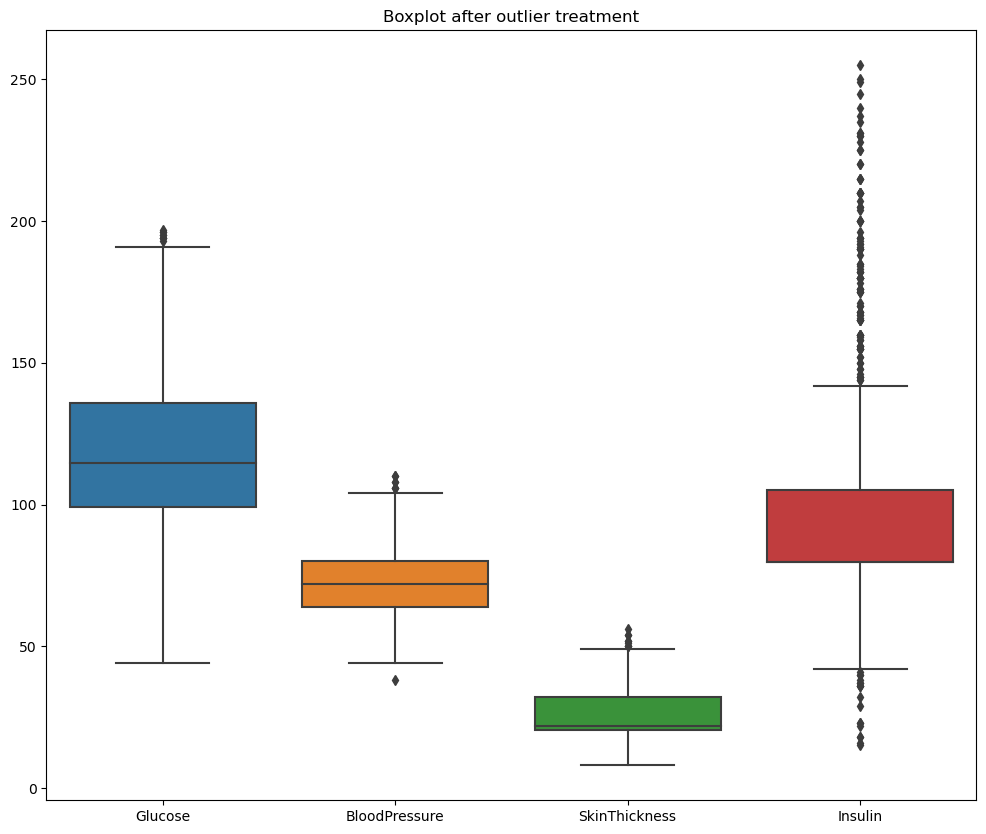

In [24]:
plt.figure(figsize = (12, 10))
sns.boxplot(data = col)
plt.title("Boxplot after outlier treatment")
plt.show()

## Inferences

The above figure displays that the outliers have been significantly reduced and the dataset is ready for further analysis.

# EDA - Univariate Analysis

**Visualiation of variables using histograms**

In [25]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


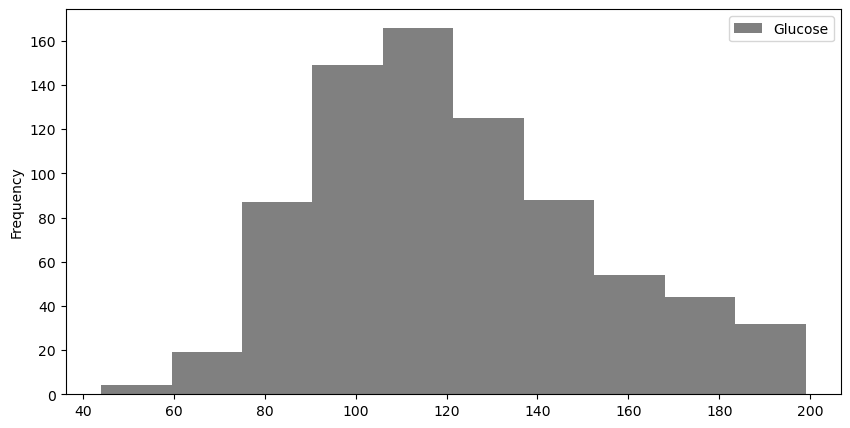

In [26]:
data['Glucose'].plot(kind = 'hist', figsize = (10, 5), color = 'grey')
plt.legend()
plt.show()

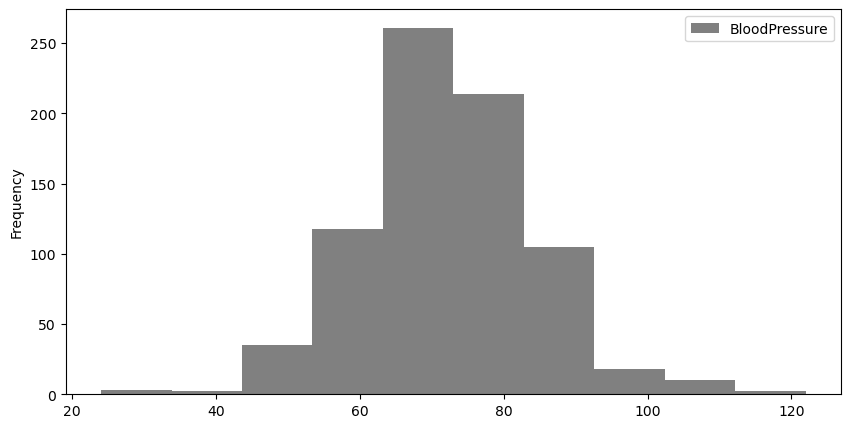

In [27]:
data['BloodPressure'].plot(kind = 'hist', figsize = (10, 5), color = 'grey')
plt.legend()
plt.show()

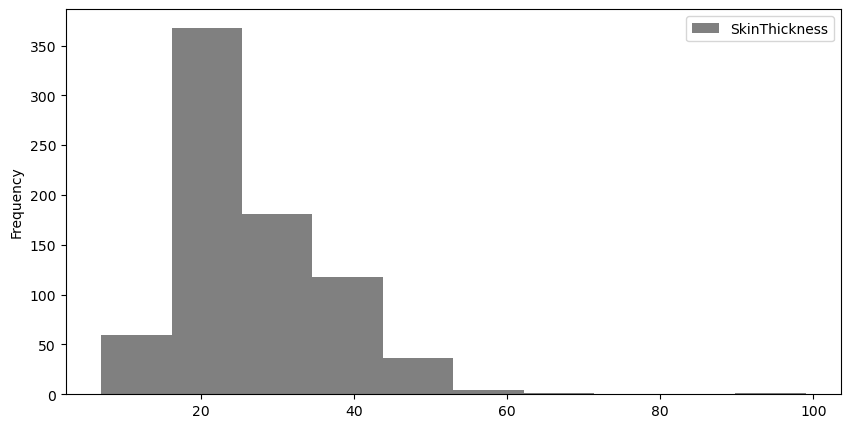

In [28]:
data['SkinThickness'].plot(kind = 'hist', figsize = (10, 5), color = 'grey')
plt.legend()
plt.show()

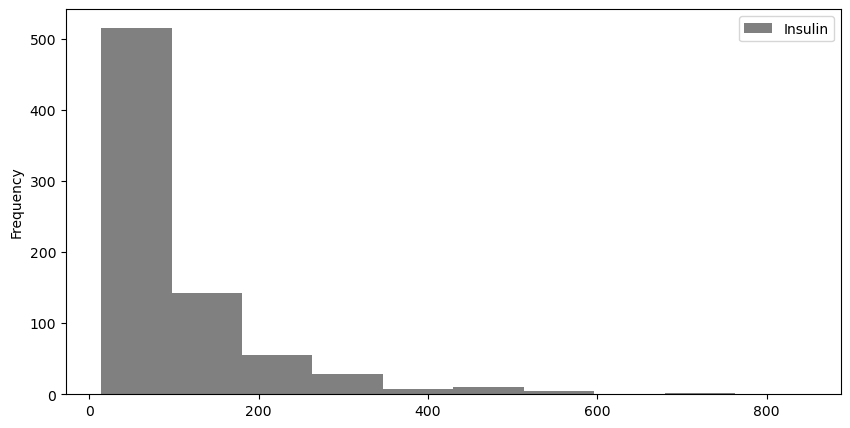

In [29]:
data['Insulin'].plot(kind = 'hist', figsize = (10, 5), color = 'grey')
plt.legend()
plt.show()

**Visualization using violin plot**

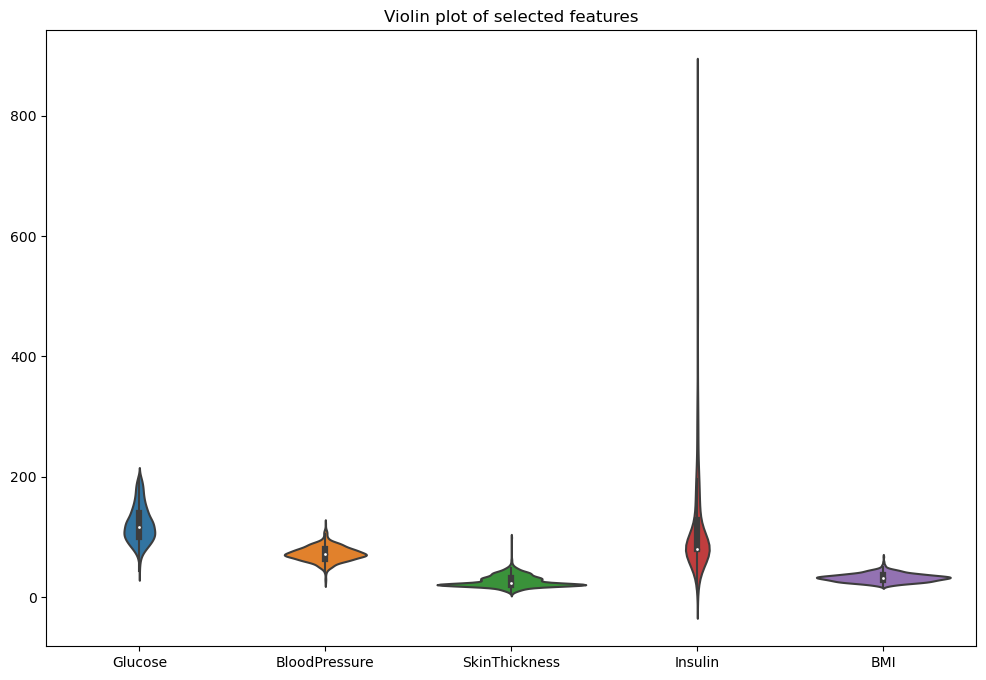

In [30]:
plt.figure(figsize = (12, 8))
sns.violinplot(data = data[selected_columns])
plt.title("Violin plot of selected features")
plt.show()

**The violin above shows the distribution of five numerical features: Glucose, BloodPressure, SkinThickness, Insulin and BMI.
The violin shape represents the Probability Density Function (PDF) of each feature, and the box plot embedded within each violin plot shows median, Inter-quartile range (IQR) and outliers.**


**Visualization using KDE**

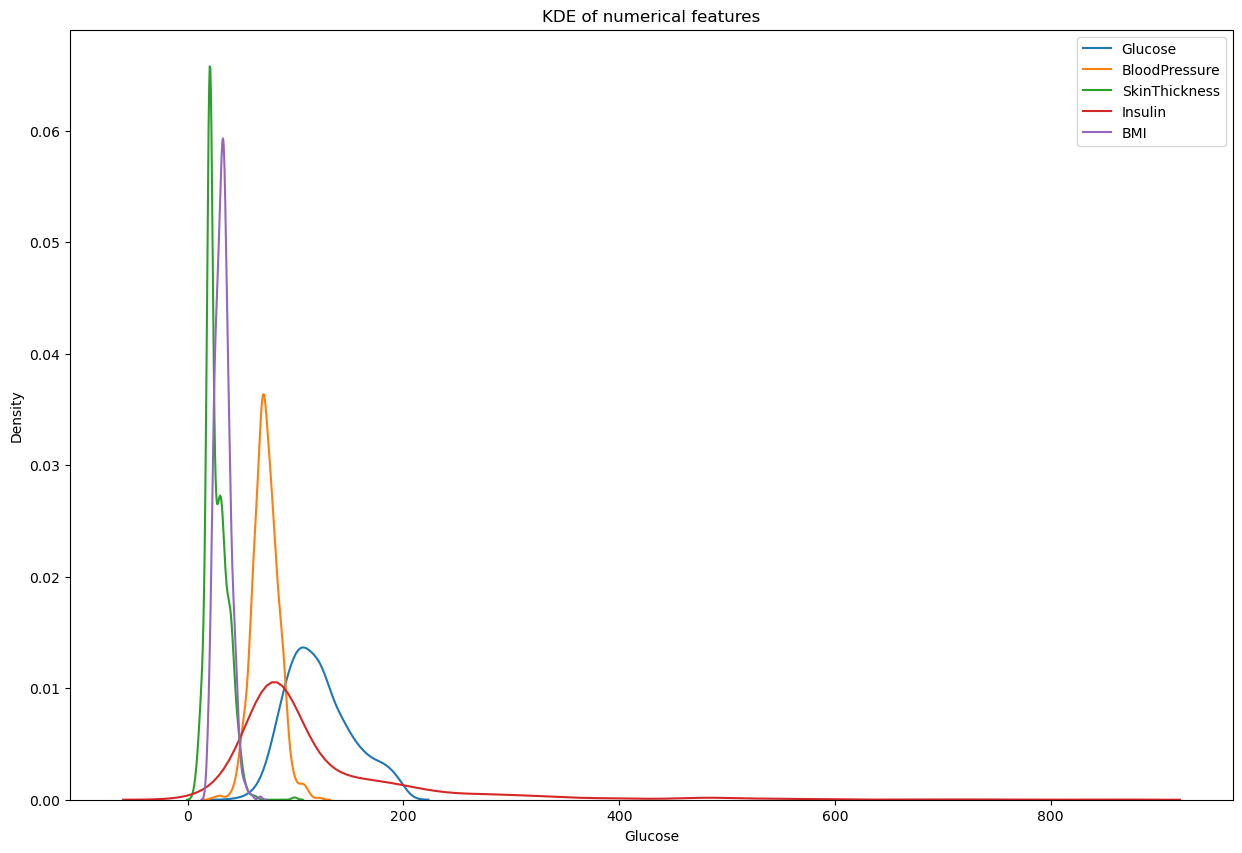

In [31]:
plt.figure(figsize = (15, 10))
for column in selected_columns:
    sns.kdeplot(data[column], label = column)
plt.title("KDE of numerical features")
plt.legend()
plt.show()

**The graph above represents Kernel Density Estimation (KDE) of five numerical features: Glucose, BloodPressure, SkinThickness, Insulin and BMI. 
It is a non-parametric method for estimating PDF of a random variable.
The above KDE plot shows PDF of each feature, which is important to visualize the distribution of the data.**

## Creating the count(frequency) plot explaining each data type and each variable count

In [32]:
data.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [33]:
data.dtypes.value_counts()

float64    6
int64      3
dtype: int64

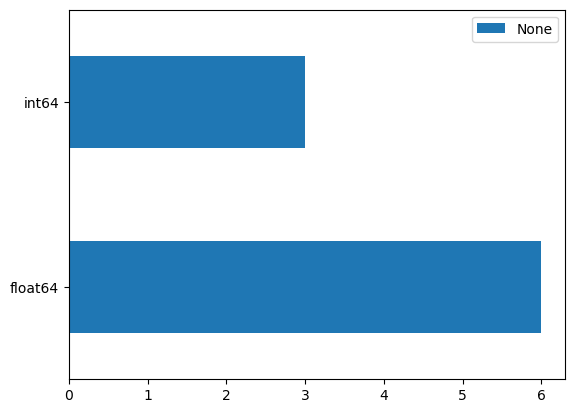

In [34]:
figsize = (15, 10)
data.dtypes.value_counts().plot(kind = 'barh')
plt.legend()
plt.show()

It can be observed that there are 3 features with integer data type and 6 features with float data type.

# Data Exploration

### Checking the balance of data by plotting the count of outcomes by their value

In [35]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

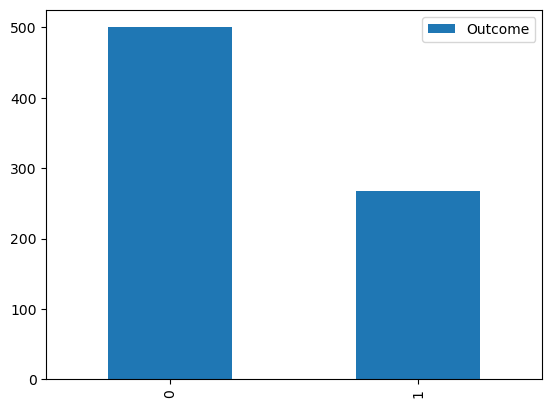

In [36]:
figsize = (15, 10)
data['Outcome'].value_counts().plot(kind = 'bar')
plt.legend()
plt.show()

In [37]:
outcome = data['Outcome'].value_counts(1)*100
outcome

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

## Inferences from Outcome Distribution

### 1. Class Imbalance 

- The dataset exhibit class imbalance on the 'Outcome' variable.
- Class 0 (No diabetes) has 500 instances.
- Class 1 (Diabetes) has 268 instances.

### 2. Potential impact on Modeling 

- Class imbalance may affect the performance of the machine learning models, particularly for binary classification tasks.
- Addressing class imbalance through resampling techniques or appropriate evaluation metrics is necessary.

### 3. Consideration for Predictive models 

Models may need to be evaluated and tuned to avoid biasing effects in the models towards majority data.

In [38]:
balanced_data = 100 - outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

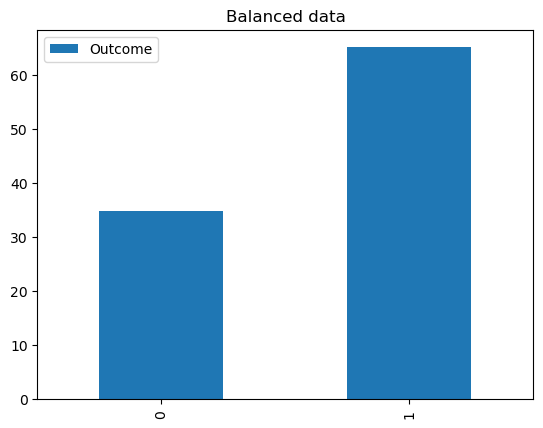

In [39]:
balanced_data.plot(kind = 'bar')
plt.legend()
plt.title("Balanced data")
plt.show()

The above plot of balanced data shows that the class imbalance has been significantly reduced and the now the model will have considerable less amount of biasing.

# Bivariate Analysis

## Generating scatter plots between pair of variables

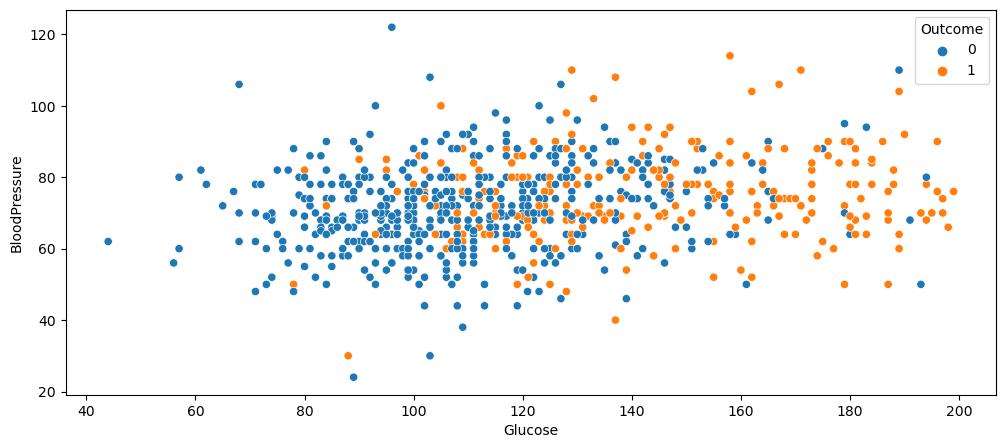

In [40]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'Glucose', y = 'BloodPressure', hue = 'Outcome', data = data)
plt.show()

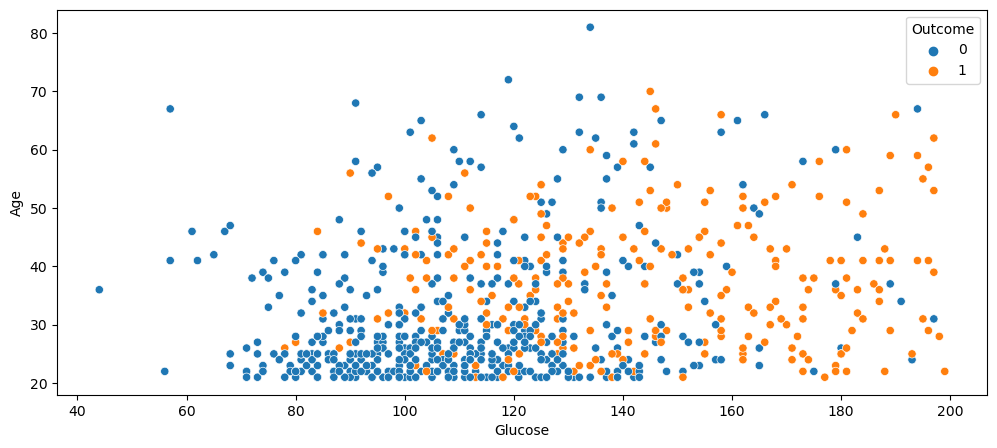

In [41]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'Glucose', y = 'Age', hue = 'Outcome', data = data)
plt.show()

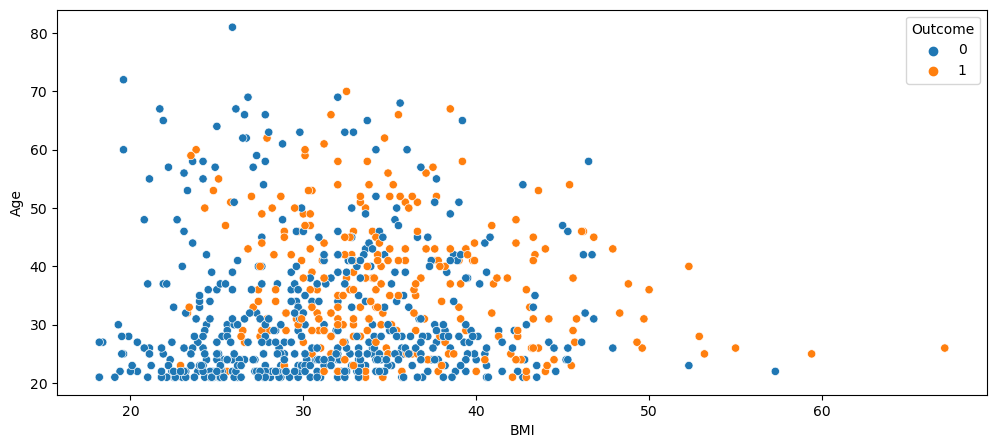

In [42]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = 'BMI', y = 'Age', hue = 'Outcome', data = data)
plt.show()

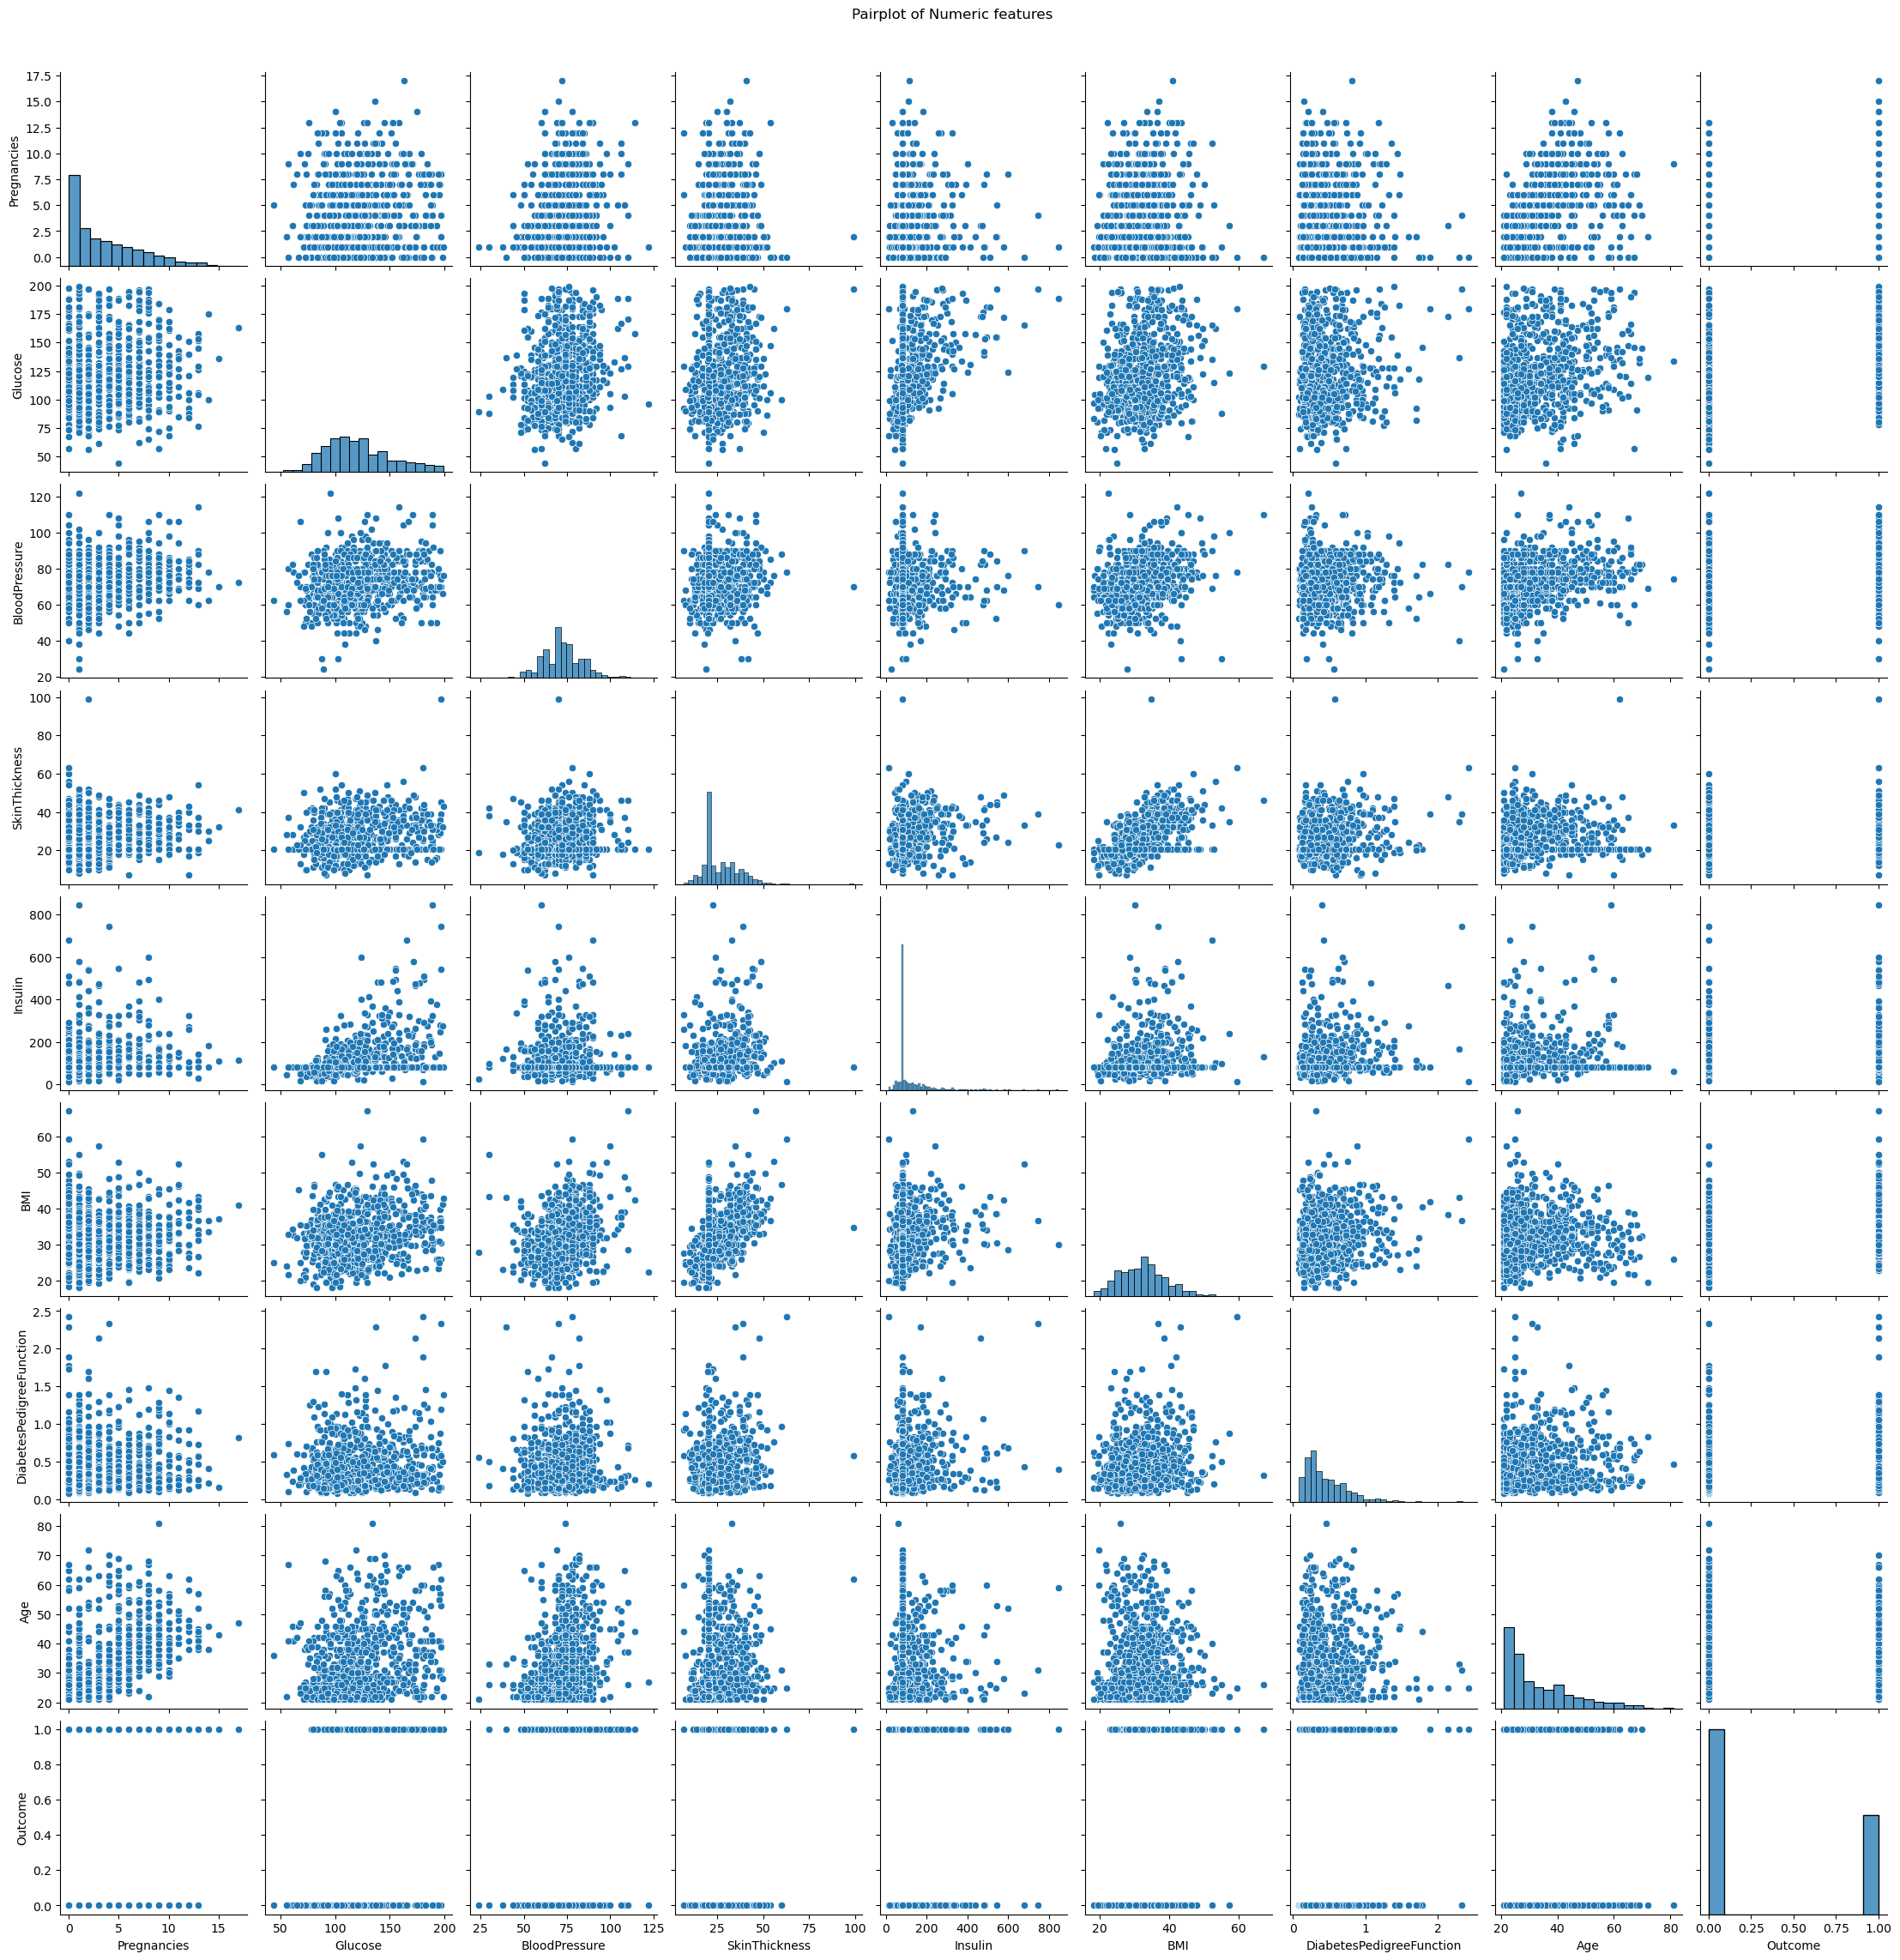

In [43]:
sns.pairplot(data)
plt.suptitle("Pairplot of Numeric features", y = 1.02)
plt.show()

# Multivariate Analysis

## Correlation heatmap

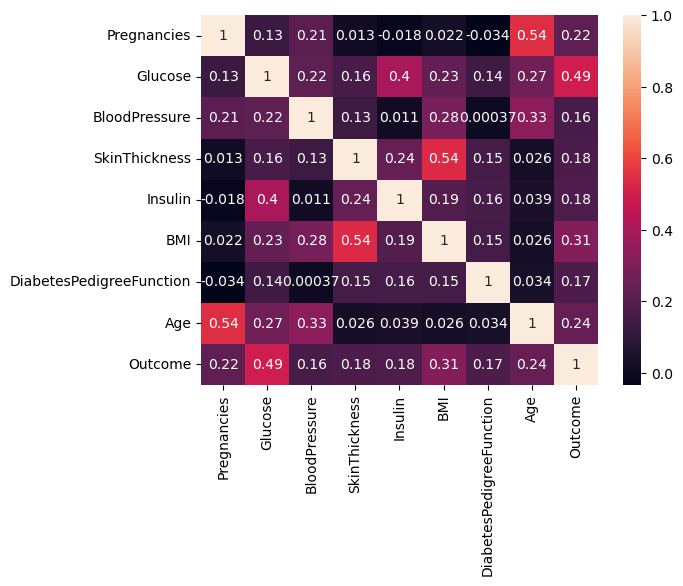

In [44]:
plt.figure9figsize = (15, 15)
sns.heatmap(data.corr(), annot = True)
plt.show()

# Inference from Correlation heatmap

1. Pregnancies
- Pregnancies has highest correlation with Age  : 0.54

2. Glucose
- Glucose is highly correlated with Outcome : 0.49
- It means, with increased glucose levels, the diabetic probability increases

3. BloodPressure
- BloodPressure has higher correlation with BMI : 0.28

4. SkinThickness
- SkinThickness is highly correlated with BMI : 0.54
- It indicates that it is dependent highly on your height and weight

5. Insulin
- Insulin has higher correlation with SkinThickness : 0.24
- It doesn't give much info and relatability to diabetic probability

#### Overall, Outcome is highly correlated with Glucose and least correlated with BloodPressure

# Data Modeling

## Feature Selection

*Data Preparation for Modeling*

In [45]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [46]:
x = data.drop(['Outcome'], axis = 1)
y = data.Outcome
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


*Finding the Correlation of every feature with Outcome (Target variable)*

In [47]:
data.corrwith(data['Outcome'])

Pregnancies                 0.221898
Glucose                     0.492908
BloodPressure               0.162986
SkinThickness               0.175026
Insulin                     0.179185
BMI                         0.312254
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

In [48]:
bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(x, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#Concatenating two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(8, 'Score'))

                      Specs        Score
4                   Insulin  1798.088682
1                   Glucose  1418.660636
7                       Age   181.303689
0               Pregnancies   111.519691
5                       BMI   108.937867
3             SkinThickness    81.917622
2             BloodPressure    41.394665
6  DiabetesPedigreeFunction     5.392682


In [49]:
type(fit)

sklearn.feature_selection._univariate_selection.SelectKBest

In [50]:
fit.scores_

array([ 111.51969064, 1418.66063574,   41.39466535,   81.91762154,
       1798.08868209,  108.93786733,    5.39268155,  181.30368904])

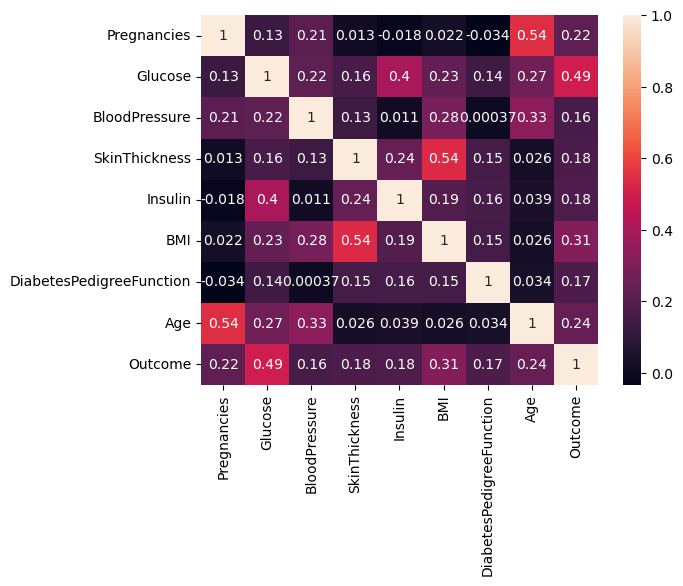

In [51]:
plt.figure9figsize = (15, 15)
sns.heatmap(data.corr(), annot = True)
plt.show()

In [52]:
new_x = data.drop(['Outcome', 'BloodPressure'], axis = 1).values
new_y = data.Outcome.values

# SMOTE for Class Imbalance

## Training the model

In [53]:
train_x, test_x, train_y, test_y = train_test_split(new_x, new_y, test_size = 0.2, random_state = 10)

In [54]:
print("Before OverSampling, counts of label '1' : {}".format(sum(train_y == 1)))
print("Before OverSampling, counts of label '0' : {}\n".format(sum(train_y == 0)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 70)
train_x_res, train_y_res = sm.fit_resample(train_x, train_y.ravel())
print('After OverSampling, shape of train_X : {}'.format((train_x_res.shape)))
print('After OverSampling, shape of train_y : {}\n'.format((train_y_res.shape)))
      
print("After OverSampling, counts of label '1' : {}", format(sum(train_y_res == 1)))
print("After OverSampling, counts of label '0' : {}", format(sum(train_y_res == 0)))

Before OverSampling, counts of label '1' : 209
Before OverSampling, counts of label '0' : 405

After OverSampling, shape of train_X : (810, 7)
After OverSampling, shape of train_y : (810,)

After OverSampling, counts of label '1' : {} 405
After OverSampling, counts of label '0' : {} 405


In [ ]:
#sc = StandardScaler()

In [ ]:
#train_x = sc.fit_transform(train_x)
#test_x = sc.fit_transform(test_x)

# Applying an appropriate classification model

# Model 1. Logistic Regression

In [55]:
logreg = LogisticRegression(solver = 'liblinear', random_state = 150)

In [56]:
logreg.fit(train_x_res, train_y_res)

LogisticRegression(random_state=150, solver='liblinear')

In [57]:
prediction = logreg.predict(test_x)

In [58]:
print('Accuracy score : ', accuracy_score(test_y, prediction))
print('Mean Squared Error : ', mean_squared_error(test_y, prediction))

Accuracy score :  0.7272727272727273
Mean Squared Error :  0.2727272727272727


In [59]:
print(classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77        95
           1       0.63      0.68      0.66        59

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.73      0.73      0.73       154



## ROC Curve

AUC: 0.850


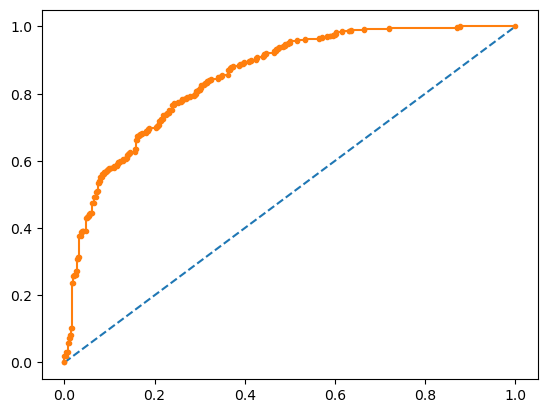

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict Probabilities
probs = logreg.predict_proba(train_x_res)

# Keep probabilities for positive outcome only
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(train_y_res, probs)
print('AUC: %.3f' % auc)

# Calculate roc curve
fpr, tpr, thresholds = roc_curve(train_y_res, probs)

# Plot no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, marker = '.')
plt.show()

# Model 2. Random Forest Classifier

In [61]:
rf = RandomForestClassifier(random_state = 50, max_depth = 5)

In [62]:
rf.fit(train_x_res, train_y_res)

RandomForestClassifier(max_depth=5, random_state=50)

In [63]:
rf_prediction = rf.predict(test_x)

In [70]:
print('Accuracy score : ', accuracy_score(test_y, rf_prediction))
print('Mean Squared Error : ', mean_squared_error(test_y, rf_prediction))

Accuracy score :  0.7727272727272727
Mean Squared Error :  0.22727272727272727


In [71]:
print((confusion_matrix(test_y, rf_prediction)))

[[72 23]
 [12 47]]


In [72]:
print((classification_report(test_y, rf_prediction)))

              precision    recall  f1-score   support

           0       0.86      0.76      0.80        95
           1       0.67      0.80      0.73        59

    accuracy                           0.77       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.79      0.77      0.78       154



## ROC Curve 

AUC: 0.940


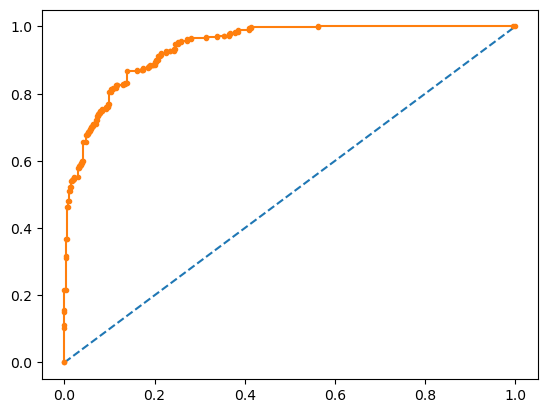

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict Probabilities
probs = rf.predict_proba(train_x_res)

# Keep probabilities for positive outcome only
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(train_y_res, probs)
print('AUC: %.3f' % auc)

# Calculate roc curve
fpr, tpr, thresholds = roc_curve(train_y_res, probs)

# Plot no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, marker = '.')
plt.show()

## Random Forest Classifier Tuning (Hyper Parameter)

In [73]:
param_grid = {'n_estimators': [100,400,200,300], 'criterion': ['gini', 'entropy'], 'max_depth': [1,2,3], 'min_samples_split': [2,4,3], 'min_samples_leaf': [1,2,3], 'max_leaf_nodes': [1,2,3], 'max_samples': [2,4,3]}

In [74]:
grid = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1, cv = 5, verbose = 2)

In [75]:
#grid.fit(train_x_res, train_y_res)

In [76]:
#grid.best_params_

In [77]:
rf_grid = RandomForestClassifier(criterion = 'gini', max_depth = 2, max_leaf_nodes = 3, max_samples = 4, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 400, random_state = 42)

In [78]:
rf_grid.fit(train_x_res, train_y_res)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, max_samples=4,
                       min_samples_split=3, n_estimators=400, random_state=42)

In [79]:
rf_grid_predict = rf_grid.predict(test_x)

In [80]:
print('Accuracy score : ', accuracy_score(test_y, rf_grid_predict))
print('Mean Squared Error : ', mean_squared_error(test_y, rf_grid_predict))

Accuracy score :  0.7532467532467533
Mean Squared Error :  0.24675324675324675


In [81]:
print((confusion_matrix(test_y, rf_grid_predict)))

[[65 30]
 [ 8 51]]


In [82]:
print(classification_report(test_y, rf_grid_predict))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77        95
           1       0.63      0.86      0.73        59

    accuracy                           0.75       154
   macro avg       0.76      0.77      0.75       154
weighted avg       0.79      0.75      0.76       154



## ROC Curve

AUC: 0.850


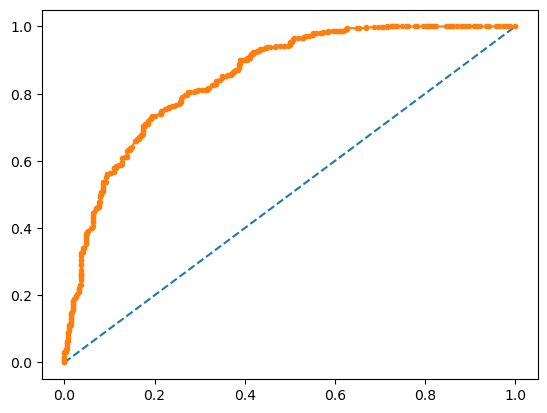

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict Probabilities
probs = rf_grid.predict_proba(train_x_res)

# Keep probabilities for positive outcome only
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(train_y_res, probs)
print('AUC: %.3f' % auc)

# Calculate roc curve
fpr, tpr, thresholds = roc_curve(train_y_res, probs)

# Plot no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, marker = '.')
plt.show()

# Model 3. Decision Tree Classifier

In [84]:
dc = DecisionTreeClassifier(random_state = 50)

In [85]:
dc.fit(train_x_res, train_y_res)

DecisionTreeClassifier(random_state=50)

In [86]:
dc_predict = dc.predict(test_x)

In [87]:
print('Accuracy score : ', accuracy_score(test_y, dc_predict))
print('Mean Squared Error : ', mean_squared_error(test_y, dc_predict))

Accuracy score :  0.7012987012987013
Mean Squared Error :  0.2987012987012987


In [88]:
print(classification_report(test_y, dc_predict))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        95
           1       0.62      0.56      0.59        59

    accuracy                           0.70       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.70      0.70      0.70       154



## Decision Tree Classifier Tuning (Hyper Parameter)

In [89]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [90]:
import warnings
warnings.filterwarnings('ignore')
dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)
dc_grid.fit(train_x_res,train_y_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

In [105]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_leaf_nodes': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 1,
 'splitter': 'best'}

In [106]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [107]:
dc_final.fit(train_x_res, train_y_res)
dc_final_pred = dc_final.predict(test_x)

In [108]:
print('Accuracy_score -',accuracy_score(test_y,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(test_y,dc_final_pred))

Accuracy_score - 0.6883116883116883
Mean_squared_error - 0.3116883116883117


In [109]:
print((confusion_matrix(test_y, dc_final_pred)))

[[76 19]
 [29 30]]


In [110]:
print((classification_report(test_y, dc_final_pred)))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        95
           1       0.61      0.51      0.56        59

    accuracy                           0.69       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.68      0.69      0.68       154



## ROC Curve 

AUC: 0.795


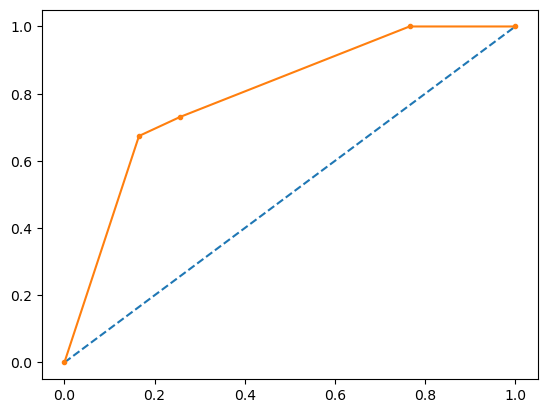

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict Probabilities
probs = dc_final.predict_proba(train_x_res)

# Keep probabilities for positive outcome only
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(train_y_res, probs)
print('AUC: %.3f' % auc)

# Calculate roc curve
fpr, tpr, thresholds = roc_curve(train_y_res, probs)

# Plot no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, marker = '.')
plt.show()

# Model 4. KNN

In [112]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)

In [113]:
knn.fit(train_x_res, train_y_res)

KNeighborsClassifier(n_neighbors=4)

In [114]:
knn_predict = knn.predict(test_x)

In [115]:
print('Accuracy score : ', accuracy_score(test_y, knn_predict))
print('Mean Squared Error : ', mean_squared_error(test_y, knn_predict))

Accuracy score :  0.6753246753246753
Mean Squared Error :  0.3246753246753247


In [116]:
print((confusion_matrix(test_y, knn_predict)))

[[75 20]
 [30 29]]


In [117]:
print(classification_report(test_y, knn_predict))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        95
           1       0.59      0.49      0.54        59

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.67       154



## ROC Curve 

AUC: 0.954


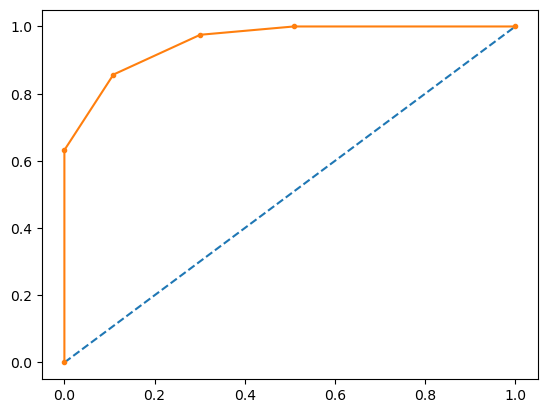

In [118]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Predict Probabilities
probs = knn.predict_proba(train_x_res)

# Keep probabilities for positive outcome only
probs = probs[:, 1]

# Calculate AUC
auc = roc_auc_score(train_y_res, probs)
print('AUC: %.3f' % auc)

# Calculate roc curve
fpr, tpr, thresholds = roc_curve(train_y_res, probs)

# Plot no skill
plt.plot([0, 1], [0, 1], linestyle = '--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, marker = '.')
plt.show()

# Model 5. SVM

In [119]:
svm =  SVC(kernel="rbf", C=0.025,random_state=101)
svm.fit(train_x_res, train_y_res)
svm_pred = svm.predict(test_x)

In [120]:
svm.fit(train_x_res, train_y_res)

SVC(C=0.025, random_state=101)

In [121]:
svm_predict = svm.predict(test_x)

In [122]:
print('Accuracy score : ', accuracy_score(test_y, svm_predict))
print('Mean Squared Error : ', mean_squared_error(test_y, svm_predict))

Accuracy score :  0.6623376623376623
Mean Squared Error :  0.33766233766233766


In [128]:
print((confusion_matrix(test_y, svm_predict)))

[[71 24]
 [28 31]]


In [129]:
print(classification_report(test_y, svm_predict))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73        95
           1       0.56      0.53      0.54        59

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.66      0.66      0.66       154



# Model Accuracy Comparison

In [130]:
Algorithms=['KNN','RandomForest','Decisiontree','logreg', 'SVM']
Accuracy_Score=[accuracy_score(test_y,knn_predict),accuracy_score(test_y,rf_grid_predict),accuracy_score(test_y,dc_final_pred),accuracy_score(test_y, prediction), accuracy_score(test_y, svm_predict)]
# Create a DataFrame
accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})
 
# Display the accuracy table
print(accuracy_df)

      Algorithm  Accuracy
0           KNN  0.675325
1  RandomForest  0.753247
2  Decisiontree  0.688312
3        logreg  0.727273
4           SVM  0.662338


# Inferences from Model Accuracy Comparison

## 1. Random Forest Classifier is the best performing model

Random Forest Classifier performs the best with an Accuracy of 77% (before Hyper - parameter tuning) among all the algorithms used for model creation.

## 2. SVM has lowest accuracy

SVM has the lowest accuracy of all the algorithms which is equal to 66%.

## 3. Consideration for Model selection 

The choice of algortihm selection depends on various factors, including task specific characteristics, interpretability, and computational efficiency.

## 4. Model evaluation 

Aside from accuracy, other evaluation metrics are used to evaluate the model, including Precision, recall and f1-score.

# Comparison of various models with the results from KNN algorithm

In [140]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
rf_cv=RandomForestClassifier(random_state=123)
svm_cv=SVC()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Random Forest',4:'SVM'}
cv_models=[logreg_cv,dt_cv,knn_cv,rf_cv,svm_cv]
 
 
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, train_x_res, train_y_res, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.745679012345679
Decision Tree Test Accuracy: 0.7703703703703704
KNN Test Accuracy: 0.7864197530864198
Random Forest Test Accuracy: 0.825925925925926
SVM Test Accuracy: 0.7432098765432098


## Inferences from Model comparison with KNN algorithm results 

## 1. Random Forest performs the best

Random Forest classifier outperforms all other algorithms with a test accuracy of 82%.

## 2. Decisive Model differences

Logistic Regression and SVM do not perform well and show lower accuracies, both approximately equal to 74%.

## 3. Consideration for Model selection 

Random forest and KNN might be considered for model creation with highest accuracies among other algorithms, but other factors must also be considered including interpretability and computational efficiency.

## 4. Cross - validation insights 

The use of cross - validation provides a robust estimate of model performance, reducing the impact of data - partitioning on results.

## 5. Further exploration 

Evaluation metrics, beyond accuracy must be considered such as Recall, f1-score and precision for further model exploration in order to improve model's performance.